# Notebook for "simpler" Machine Learning approaches

This notebook takes the preprocessed data and applies and evaluates different machine learning techniques for predicting future take rates.

In [92]:
import pandas as pd

## Import dataframe prepared for machine learning (MLbase_DataFrame)

In [93]:
df = pd.read_csv('../CLAAS_data/MLbase_DataFrame.csv')

In [94]:
import numpy as np

def add_sin_cos_dates(self):
        self.date_column = 'Datum'
        # Konvertieren der Datumsspalte in das Datetime-Format
        self[self.date_column] = pd.to_datetime(self[self.date_column])
        # Erstellen von Jahr- und Monatsspalten
        self['Jahr'] = self[self.date_column].dt.year
        self['Monat'] = self[self.date_column].dt.month
        # Erstellen zyklischer Eigenschaften für den Monat
        self['Monat_sin'] = np.sin(2 * np.pi * self['Monat'] / 12)
        self['Monat_cos'] = np.cos(2 * np.pi * self['Monat'] / 12)

add_sin_cos_dates(df)

In [95]:
df

,Datum,Merkmal,Merkmalwert,Bestätigte Menge,Relativer Anteil,AgriSpot,CBI,CBIPS,CBIPSFE,CornSpot,GER10Y,SoySpot,USTR10Y,WeizenSpot,WtiOilSpot,Jahr,Monat,Monat_sin,Monat_cos
0,2013-04-01,B10,B10-0030,3,0.007692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,4,8.660254e-01,-0.500000
1,2013-05-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,5.000000e-01,-0.866025
2,2013-06-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,6,1.224647e-16,-1.000000
3,2013-07-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,7,-5.000000e-01,-0.866025
4,2013-08-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,8,-8.660254e-01,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18761,2023-10-01,P02,P02-2078,0,0.000000,234.182,-31.9,-20.5,-43.2,217.797,2.911,260.098,4.687,198.708,88.82,2023,10,-8.660254e-01,0.500000
18762,2023-11-01,P02,P02-2078,10,0.033333,234.431,-39.7,-35.9,-43.5,214.936,2.758,263.268,4.761,196.365,81.04,2023,11,-5.000000e-01,0.866025
18763,2023-12-01,P02,P02-2078,1,0.003846,232.888,-47.5,-38.4,-56.6,215.360,2.363,266.732,4.220,199.354,73.72,2023,12,-2.449294e-16,1.000000
18764,2024-01-01,P02,P02-2078,0,0.000000,228.351,-49.5,-40.2,-58.8,210.593,2.029,256.195,3.866,206.624,71.89,2024,1,5.000000e-01,0.866025


In [96]:
# diese Zelle später rausnehmen (wird in pipeline gemacht)
df.fillna(0, inplace=True)


## Preprocess Data for ML models
### Encode categorical data
### Scale numerical data

In [97]:
from sklearn.preprocessing import MinMaxScaler



# Create a StandardScaler object
scaler = MinMaxScaler()

# Select only the numerical columns in the DataFrame
numerical_columns = df.drop(columns=['Datum', 'Merkmal', 'Merkmalwert', 'Bestätigte Menge', 'Relativer Anteil', 'Jahr', 'Monat_sin', 'Monat_cos'])
#numerical_columns = df.drop(columns=['Datum', 'Merkmal', 'Merkmalwert', 'Bestätigte Menge', 'Relativer Anteil'])

# Scale the numerical columns
scaled_columns = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with the scaled columns
scaled_df = pd.DataFrame(scaled_columns, columns=numerical_columns.columns)

# Concatenate the scaled numerical columns with the non-numerical columns
df_scaled = pd.concat([df.drop(columns=numerical_columns.columns), scaled_df], axis=1)

In [98]:
df_scaled

,Datum,Merkmal,Merkmalwert,Bestätigte Menge,Relativer Anteil,Jahr,Monat_sin,Monat_cos,AgriSpot,CBI,CBIPS,CBIPSFE,CornSpot,GER10Y,SoySpot,USTR10Y,WeizenSpot,WtiOilSpot,Monat
0,2013-04-01,B10,B10-0030,3,0.007692,2013,8.660254e-01,-0.500000,0.000000,0.478355,0.427627,0.521964,0.000000,0.194075,0.000000,0.000000,0.000000,0.000000,0.272727
1,2013-05-01,B10,B10-0030,0,0.000000,2013,5.000000e-01,-0.866025,0.000000,0.478355,0.427627,0.521964,0.000000,0.194075,0.000000,0.000000,0.000000,0.000000,0.363636
2,2013-06-01,B10,B10-0030,0,0.000000,2013,1.224647e-16,-1.000000,0.000000,0.478355,0.427627,0.521964,0.000000,0.194075,0.000000,0.000000,0.000000,0.000000,0.454545
3,2013-07-01,B10,B10-0030,0,0.000000,2013,-5.000000e-01,-0.866025,0.000000,0.478355,0.427627,0.521964,0.000000,0.194075,0.000000,0.000000,0.000000,0.000000,0.545455
4,2013-08-01,B10,B10-0030,0,0.000000,2013,-8.660254e-01,-0.500000,0.000000,0.478355,0.427627,0.521964,0.000000,0.194075,0.000000,0.000000,0.000000,0.000000,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18761,2023-10-01,P02,P02-2078,0,0.000000,2023,-8.660254e-01,0.500000,0.768831,0.248196,0.277002,0.242894,0.678324,1.000000,0.801685,0.984457,0.557824,0.770606,0.818182
18762,2023-11-01,P02,P02-2078,10,0.033333,2023,-5.000000e-01,0.866025,0.769648,0.191919,0.163850,0.240956,0.669414,0.957641,0.811456,1.000000,0.551246,0.703106,0.909091
18763,2023-12-01,P02,P02-2078,1,0.003846,2023,-2.449294e-16,1.000000,0.764582,0.135642,0.145481,0.156331,0.670734,0.848283,0.822133,0.886368,0.559637,0.639597,1.000000
18764,2024-01-01,P02,P02-2078,0,0.000000,2024,5.000000e-01,0.866025,0.749687,0.121212,0.132256,0.142119,0.655887,0.755814,0.789655,0.812014,0.580046,0.623720,0.000000


In [99]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df_scaled.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in df_encoded.columns:
    # Check if the column is categorical and not the "Datum" column
    if df_encoded[column].dtype == 'object' and column != 'Datum':
        # Encode the categorical values
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Print the encoded DataFrame
print(df_encoded)

           Datum  Merkmal  Merkmalwert  Bestätigte Menge  Relativer Anteil  \
0     2013-04-01        0            0                 3          0.007692   
1     2013-05-01        0            0                 0          0.000000   
2     2013-06-01        0            0                 0          0.000000   
3     2013-07-01        0            0                 0          0.000000   
4     2013-08-01        0            0                 0          0.000000   
...          ...      ...          ...               ...               ...   
18761 2023-10-01        5          380                 0          0.000000   
18762 2023-11-01        5          380                10          0.033333   
18763 2023-12-01        5          380                 1          0.003846   
18764 2024-01-01        5          380                 0          0.000000   
18765 2024-02-01        5          380                 5          0.019157   

       Jahr     Monat_sin  Monat_cos  AgriSpot       CBI     CB

# Correlation

Text(0.5, 1.0, 'pearson correlation')

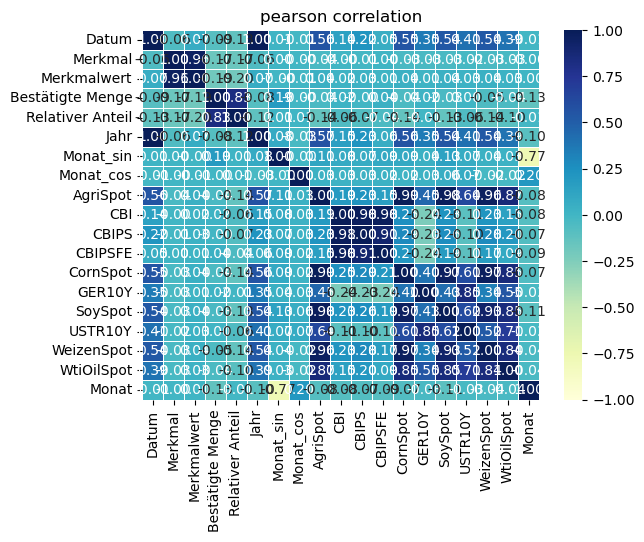

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_encoded.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")


## Train Test Split

Split data and only use training data for training the models! Test Data 10/23 - 05/24

In [100]:
# Convert the "Datum" column to datetime
df_encoded['Datum'] = pd.to_datetime(df_encoded['Datum'])

# Separate the dataframes
df_train = df_encoded[df_encoded['Datum'] <= pd.to_datetime('2023-09-30')]  # Entries before (including) September 2023 
df_test = df_encoded[df_encoded['Datum']  >= pd.to_datetime('2023-10-01')]  # Entries from October 2023 onwards

# drop "Datum" column, only use Jahr, Monat, Monat_sin and Monat_cos
df_train = df_train.drop(columns=['Datum'])
df_test = df_test.drop(columns=['Datum'])

In [101]:
X_test = df_test.drop(['Bestätigte Menge', 'Relativer Anteil'], axis=1)
y_test = df_test['Relativer Anteil']

In [102]:
X_training = df_train.drop(['Bestätigte Menge', 'Relativer Anteil'], axis=1)
y_training = df_train['Relativer Anteil']

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.2, random_state=42)

## Apply different models

### Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create an instance of the Linear Regression model
model_linearRegression = LinearRegression()

# Fit the model on the training data
model_linearRegression.fit(X_train, y_train)

# Predict the target variable for the training data
y_train_pred = model_linearRegression.predict(X_train)

# Calculate the error on the training data
rmse_train_linearRegression = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict the target variable for the validation data
y_val_pred = model_linearRegression.predict(X_val)

# Calculate the error on the validation data
rmse_val_linearRegression = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Print the errors
print("Training Error:", rmse_train_linearRegression)
print("Validation Error:", rmse_val_linearRegression)


# Check whether low error comes from predicting 0s
y_val_non0 = y_val[y_val != 0]
y_val_pred_non0 = pd.Series(y_val_pred[y_val != 0])

# Calculate the error on the non zero validation data
rmse_val_linearRegression_non0 = np.sqrt(mean_squared_error(y_val_non0, y_val_pred_non0))
print("Validation Error for non zero true values:", rmse_val_linearRegression_non0)

Training Error: 0.07988837016321068
Validation Error: 0.08168574978716078
Validation Error for non zero true values: 0.09761592003205423


In [148]:
# Predict the target variable for the test data
y_test_pred = model_linearRegression.predict(X_test)
rmse_test_linearRegression = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Testing Error:", rmse_test_linearRegression)

# Check whether low error comes from predicting 0s
y_test_non0 = y_test[y_test != 0]
y_test_pred_non0 = pd.Series(y_test_pred[y_test != 0])

# Calculate the error on the non zero test data
rmse_test_linearRegression_non0 = np.sqrt(mean_squared_error(y_test_non0, y_test_pred_non0))
print("Testing Error for non zero true values:", rmse_test_linearRegression_non0)

Testing Error: 0.06947401080633715
Testing Error for non zero true values: 0.07338468348662652


### Non-Linear Regression

In [109]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Create an instance of the Linear Regression model
model_nonlinearRegression = ElasticNet()

# Fit the model on the training data
model_nonlinearRegression.fit(X_train, y_train)

# Predict the target variable for the training data
y_train_pred = model_nonlinearRegression.predict(X_train)

# Calculate the error on the training data
rmse_train_nonlinearRegression = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict the target variable for the validation data
y_val_pred = model_nonlinearRegression.predict(X_val)

# Calculate the error on the validation data
rmse_val_nonlinearRegression = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Print the errors
print("Training Error:", rmse_train_nonlinearRegression)
print("Validation Error:", rmse_val_nonlinearRegression)

Training Error: 0.08111060176638073
Validation Error: 0.08305579597744897


# Problem: Modelle predicten auf X-werten die entsprechenden y_werte.
Dabei sollte auf alten X_werten die y_werte von t+1 bis t+12 generiert werden können